<a href="https://colab.research.google.com/github/Shrieejanani/Airline_Ticket_Fare_Prediction/blob/main/Flight_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the data

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_excel("/content/Data_Train.xlsx")

In [ ]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [ ]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Data Cleaning

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#Check Missing Values---Values which occur when no data is recorded for observation
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data["Total_Stops"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [ ]:
#Getting all the rows where we have missing values
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Perform Data Preprocess and extract derived attributes from "Date_of_journey"



*Extract derived attributes from "Date _of_journey" & fetch day,month,year*

In [ ]:
data = train_data.copy()

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

From description we can see that Date_of_Journey is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our
 model will not be able to understand these string values,it just understand Time-stamp
For this we require pandas to_datetime to convert object data type to datetime dtype.

In [ ]:
def change_into_Datetime(col):
  data[col] = pd.to_datetime(data[col])

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
data["Date_of_Journey"].dt.day

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Date_of_Journey, Length: 10682, dtype: int64

In [ ]:
data["Date_of_Journey"].dt.month

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int64

In [ ]:
data["Date_of_Journey"].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10682, dtype: int64

In [ ]:
data["Journey_Date"]=data["Date_of_Journey"].dt.day

In [ ]:
data["Journey_Month"]=data["Date_of_Journey"].dt.month

In [ ]:
data["Journey_Year"]=data["Date_of_Journey"].dt.year

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-25 05:50:00,2024-01-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


# Clean Dep_Time & Arrival_Time & then extract Derived attributes

In [ ]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Date', 'Journey_Month',
       'Journey_Year'],
      dtype='object')

In [ ]:
# Departure time is when a plane leaves the gate.

extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-25 05:50:00,2024-01-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-25 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [ ]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-25 05:50:00,2024-01-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-25 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [ ]:
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [ ]:
data.shape

(10682, 16)

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


# Analyse when most of the flights take off

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [ ]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"

In [ ]:
###### This function takes the flight Departure time and convert into appropriate format. ######

<Axes: >

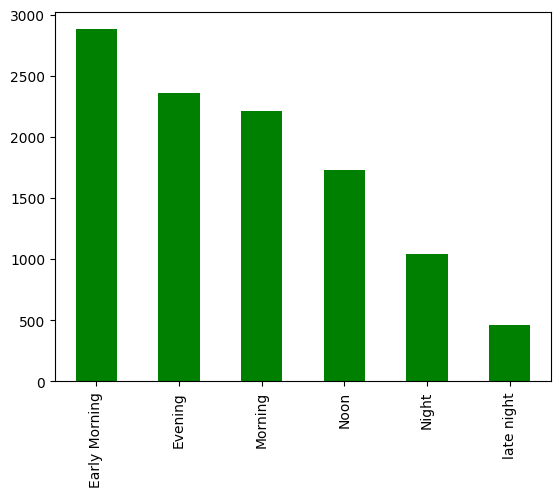

In [ ]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

In [ ]:
###### To make above graph interactive,we use Cufflinks & plotly!

In [ ]:
!pip install plotly
!pip install chart_studio

In [ ]:
!pip install cufflinks

In [ ]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.

In [ ]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

# Pre-process Duration Feature & extract meaningful features from it.

Lets Apply pre-processing on duration column,

-->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..

-->> As my ML model is not able to understand this duration as it contains string values ,
thats why we have to tell our ML Model that this is hour & this is minute for each of the row ..

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [ ]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [ ]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [ ]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

Now after pre-processing duration feature , still my ml_model is not able to understand duration bcz it is string data ,so any how we have to convert it into numerical(integer of float) values

In [ ]:
data['Duration'][0]

'2h 50m'

In [ ]:
'2h 50m'.split(' ')

['2h', '50m']

In [ ]:
'2h 50m'.split(' ')[0]

'2h'

In [ ]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [ ]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [ ]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [ ]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [ ]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [ ]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


In [ ]:
pd.to_timedelta(data["Duration"]).dt.components.hours

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: hours, Length: 10682, dtype: int64

In [ ]:
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours

In [ ]:
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

# Analyse whether duration impacts price or not

In [ ]:
data['Duration'] ## convert duration into total minutes duration

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
2*60

120

In [ ]:
'2*60'

'2*60'

In [ ]:
eval('2*60')

120

In [ ]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [ ]:
data["Duration_in_minute"] = data["Duration_hour"]*60 + data["Duration_minute"]

In [ ]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Duration_in_minute'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

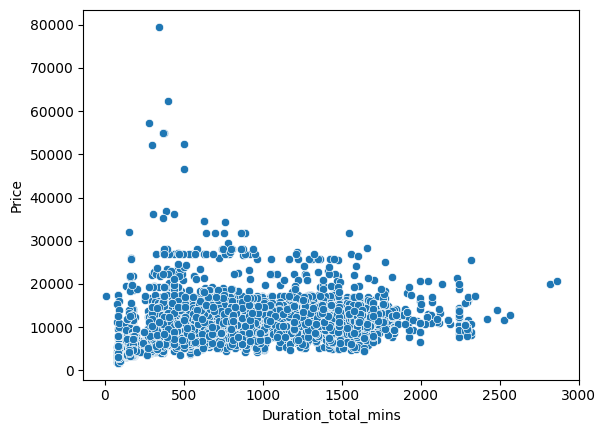

In [ ]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

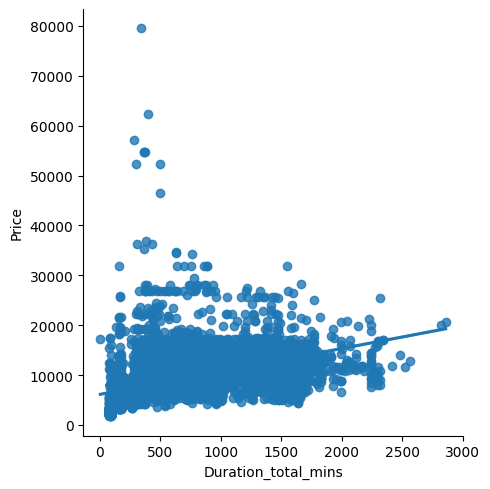

In [ ]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

### pretty clear that As the duration of minutes increases Flight price also increases.

In [ ]:
### lets understand whether total stops affect price or not !

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

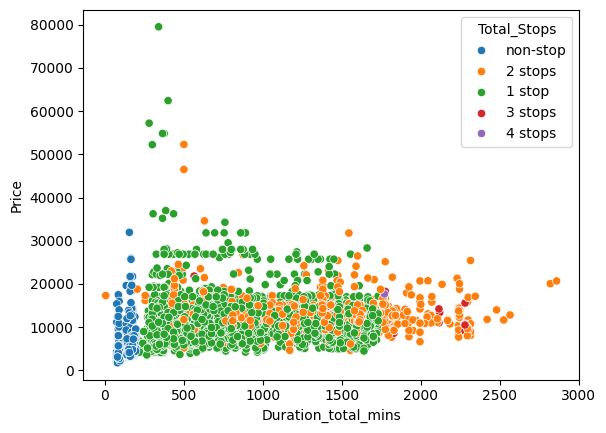

In [ ]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

Non stops flights take less duration while their fare is also low, then as the stop increases,
duration also increases and price also increases(in most of the cases)


# Analyse on which route jetairways is extremly used

In [ ]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [ ]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

# Performing Airline vs Price Analysis

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Duration_in_minute'],
      dtype='object')

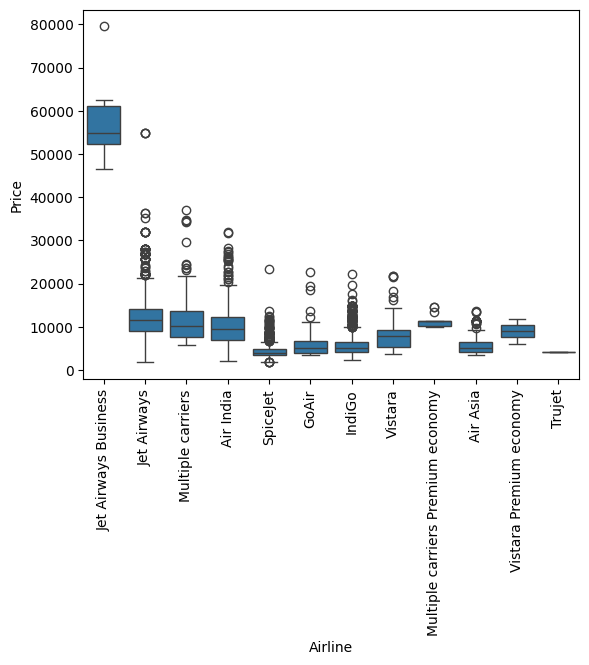

In [ ]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

Conclusion--> From graph we can see that Jet Airways Business have the highest Price.,
              Apart from the first Airline almost all are having similar median


# Applying one-hot Encoding on data

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Duration_in_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,1,10,2,50,2,50,170,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,13,15,7,25,7,25,445,445


In [ ]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [ ]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

**Handling Categorical Values**

We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [ ]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
### Applying One-hot

In [ ]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [ ]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,50,2,50,170,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,25,7,25,445,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,0,19,0,1140,1140,0,0,1,0,0


# Perform Target guide encoding on data

In [ ]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,50,2,50,170,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,25,7,25,445,445,0,1,0,0,0


In [ ]:
data['Airline'].nunique()

12

In [ ]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [ ]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [ ]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [ ]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,50,2,50,170,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,25,7,25,445,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,0,19,0,1140,1140,0,0,1,0,0


In [ ]:
### now lets perform Target Guided Mean encoding on 'Destination'

In [ ]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

till now , Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar)
which is neighbouring part of Delhi so we will consider New Delhi & Delhi as same
but in future , these conditions may change

In [ ]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [ ]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [ ]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [ ]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data['Destination'] = data['Destination'].map(dict_dest)

In [ ]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,50,2,50,170,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,25,7,25,445,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,0,19,0,1140,1140,0,0,1,0,0


# Perform Label(Manual) Encoding on Data

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,50,2,50,170,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,25,7,25,445,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,0,19,0,1140,1140,0,0,1,0,0


In [ ]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [ ]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
# As this is case of Ordinal Categorical type we perform Label encoding from scratch !
# Here Values are assigned with corresponding key

In [ ]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [ ]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

**Remove Unnecessary Features**

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,50,2,50,170,170,1,0,0,0,0


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Duration_in_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [ ]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,50,2,50,170,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,25,7,25,445,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,0,19,0,1140,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,...,25,5,25,325,325,0,1,0,0,0


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Duration_in_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data['Journey_Year'].unique()

array([2019])

lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jouney_month" , Journey_day".

Additional_Info contains almost 80% no_info , so we can drop this column.

lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"

Lets drop "Source" feature as well as we have already perform feature encoding on this Feature

lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..

In [ ]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_Year'] , axis=1 , inplace=True)

In [ ]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_Date', 'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_in_minute', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Time_hour,Dep_Time_minute,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,...,2,50,2,50,170,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,5,1,5,50,...,7,25,7,25,445,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,6,9,9,25,...,19,0,19,0,1140,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,5,12,18,5,...,5,25,5,25,325,0,1,0,0,0


In [ ]:
data.drop(columns=['Route'] , axis=1 , inplace=True)

## we can drop Route as well bcz Route is directly related to Total stops & considering 2 same features doesnt make sense while building ML model..

In [ ]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,...,2,50,2,50,170,1,0,0,0,0
1,7,3,7h 25m,2,7662,5,1,5,50,13,...,7,25,7,25,445,0,1,0,0,0
2,10,4,19h 0m,2,13882,6,9,9,25,4,...,19,0,19,0,1140,0,0,1,0,0


In [ ]:
data.drop(columns=['Duration'] , axis=1 , inplace=True)

## we can drop "Duration" feature as we have extracted "Duration hour" & "Duration Minute"

In [ ]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_in_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,2,50,170,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,7,25,445,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,19,0,1140,0,0,1,0,0


# Perform outlier detection

CAUSE FOR OUTLIERS

* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.

Here the list of data visualization plots to spot the outliers.

1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.

In [ ]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

If Features Are Skewed We Use the below Technique which is IQR

    
* Data which are greater than IQR +1.5 IQR and data which are below than   IQR - 1.5 IQR are my outliers where ,  IQR = 75th%ile data - 25th%ile data


* & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR

In [ ]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [ ]:
print(maximum)

23017.0


In [ ]:
print(minimum)

-5367.0


In [ ]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [ ]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

**Dealing with outlier**

In [ ]:
### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

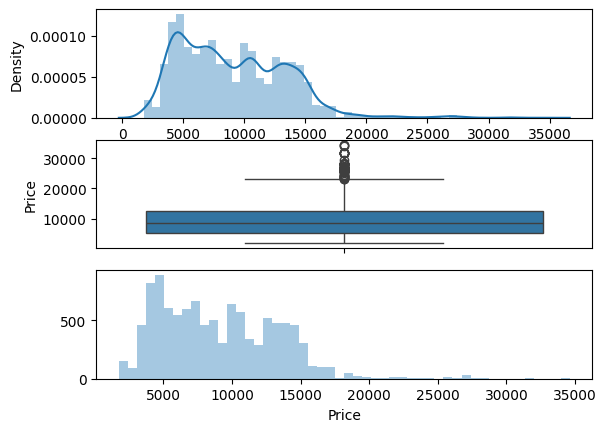

In [ ]:
plot(data , 'Price')

# Perform Feature Selection

 Q-> Feature Selection
    
    Finding out the best feature which will contribute and have good relation with target variable.
    
    
 Q-> Why to apply Feature Selection?
    
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features

In [ ]:
X = data.drop(['Price'] , axis=1)

In [ ]:
y = data['Price']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
imp = mutual_info_regression(X , y)

In [ ]:
imp = mutual_info_regression(X , y)

In [ ]:
'''
Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables.
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.

'''

'\nEstimate mutual information for a continuous target variable.\n\nMutual information between two random variables is a non-negative\nvalue, which measures the dependency between the variables. \nIf It is equal to zero it means two random variables are independent, and higher\nvalues mean higher dependency.\n\n'

In [ ]:
imp

array([0.96904718, 0.99928074, 0.78812578, 0.20590751, 0.24185656,
       0.33173743, 0.27609337, 0.40413552, 0.34538382, 0.4697492 ,
       0.33713255, 0.4253153 , 0.33931596, 0.45060058, 0.38599104,
       0.46233545, 0.52322982, 0.13561835, 0.19832112])

In [ ]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [ ]:
imp_df.columns = ['importance']

In [ ]:
imp_df

,importance
Airline,0.969047
Destination,0.999281
Total_Stops,0.788126
Journey_Date,0.205908
Journey_Month,0.241857
Dep_Time_hour,0.331737
Dep_Time_minute,0.276093
Arrival_Time_hour,0.404136
Arrival_Time_minute,0.345384
Duration_hours,0.469749


In [ ]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Destination,0.999281
Airline,0.969047
Total_Stops,0.788126
Source_Delhi,0.523230
Duration_hours,0.469749
Source_Kolkata,0.462335
Duration_in_minute,0.450601
Duration_hour,0.425315
Arrival_Time_hour,0.404136
Source_Banglore,0.385991


# Model Building

**split dataset into train & test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

what we often do in modelling:

a.Initially ,we build basic random model.

b.then later-on , we will try to improve this model using some parameters.

c.Then we will try to improve it..

d.Then we will hyper-tune the model to get optimal value of parameters in order to achieve optimal value of params.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ml_model = RandomForestRegressor()

In [ ]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [ ]:
y_pred = ml_model.predict(X_test)

In [ ]:
y_pred

array([16767.07,  5808.45,  8934.56, ...,  3504.05,  6371.34,  7272.78])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test , y_pred)

0.8048370109490246

# Save the Model

Dump ml model using pickle or joblib

advantage of dumping--

imagine in future we have new data & lets say we have to predict price on this huge data

then to do prediction on this new data , we can use this pre-trained model what we have dumped.

In [ ]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle

In [ ]:
# open a file, where you want to store the data
file = open(r'C:\Users\Admin\Desktop\unzipped files\Flight_Price_resources\pickledump', 'wb')

In [ ]:
# dump information to that file
pickle.dump(ml_model , file)

In [ ]:
model = open(r'C:\Users\Admin\Desktop\unzipped files\Flight_Price_resources\pickledump' , 'rb')

In [ ]:
forest = pickle.load(model)

In [ ]:
y_pred2 = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test , y_pred2)

0.8048370109490246

# Automate ML pipeline &  Define the Evaluation metric

In [ ]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape(y_test , y_pred)

13.365479301413128

In [ ]:
'''

    Lets automate all the stuffs

    let say ,I will just pass ml algo & i get several results like--

    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error


'''

In [ ]:
from sklearn import metrics

In [ ]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9512600037572165
predictions are : [16738.29  5993.68  8881.18 ...  3537.76  6164.03  7276.39]


r2 score : 0.8047822286251414
MAE : 1189.8505666384658
MSE : 3800421.420703215
RMSE : 1949.4669580947545
MAPE : 13.323851776032264


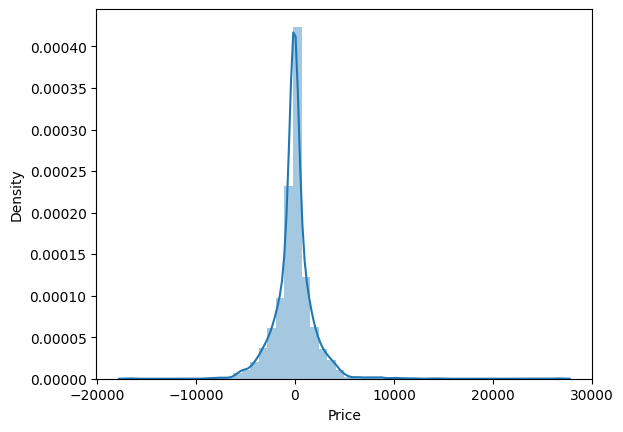

In [ ]:
predict(RandomForestRegressor())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  5135.  8610. ...  3419.  5797.  6818.]


r2 score : 0.699451197213224
MAE : 1368.945026831399
MSE : 5850963.77257727
RMSE : 2418.8765517440675
MAPE : 15.246679797813862


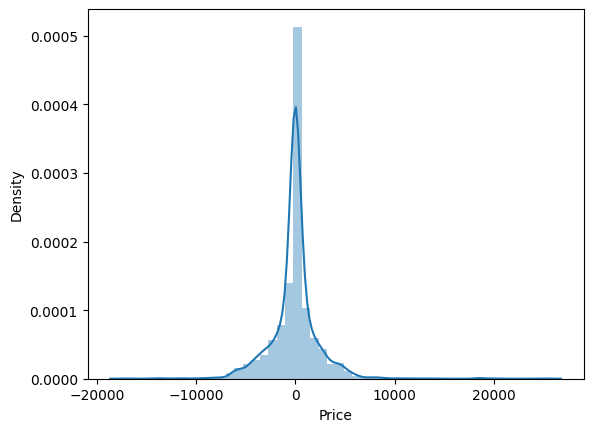

In [ ]:
predict(DecisionTreeRegressor())

# Hyperparameter Tuning or Hyperparameter Optimization

Q -> how to select which ML algo we should apply for?

 We use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation, then go for various metrics & based on domain expertise knowledge Then we can say ya this model perfoms best



## Hyperparameter Tuning or Hyperparameter Optimization

    1.Choose following method for hyperparameter tuning
    a.RandomizedSearchCV --> Fast way to Hypertune model
    b.GridSearchCV--> Slower way to hypertune my model
    2.Choose ML algo that u have to hypertune
    3.Assign hyperparameters in form of dictionary or create hyper-parameter space
    4.define searching &  apply searching on Training data or  Fit the CV model
    5.Check best parameters and best score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [ ]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [ ]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators ,
    'max_features' : max_features ,
    'max_depth' : max_depth ,
    'min_samples_split' : min_samples_split
}

In [ ]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [ ]:
## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [ ]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=10,
                      n_estimators=760)

In [ ]:
rf_random.best_score_

0.8164015707122164